# Beta Bank 

Os clientes do Beta Bank estão saindo: pouco a pouco, escapulindo todo mês. Os banqueiros descobriram que é mais barato manter os clientes existentes do que atrair novos.

Precisamos prever se um cliente vai deixar o banco em breve. Você tem os dados sobre o comportamento passado dos clientes e rescisões de contratos com o banco.

# Limpeza dos Dados


*Vamos realizar a limpeza do DataFrame para que possamos depois analisar de forma mais assertiva antes mesmo de fazer a modelagem para o Beta Bank. Essa limpeza é necessaria para que nao tenhamos dados desnecessarios e que impactem e negativamente nos nossos resultados.*

In [55]:
import pandas as pd 

In [56]:
data = pd.read_csv('/datasets/Churn.csv')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [58]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [59]:
data.columns = data.columns.str.lower()

In [60]:
data.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [61]:
data.describe(include=['object'])

,surname,geography,gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [62]:
data[data['tenure'].isna()]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [63]:
data_median = data['tenure'].median()
data['tenure'].fillna(data_median, inplace=True)
print(data['tenure'].isna().sum())

0


In [64]:
data.duplicated().sum()

0

In [65]:
# Exclusao das colunas que nao serão utilizadas no modelo e nas analises
data.drop(['rownumber', 'customerid', 'surname'], axis=1, inplace=True)

# Analise dos dados

*Agora vamos analisar os dados após toda a limpeza e filtragem que realizamos. Nesta etapa vamos fazer analises especificas para que tenhamos embasamento para a criação do nosso modelo.* 

*Vamos utilizar graficos para melhor visualização e melhor entendimento para o cliente e finalização do projeto.*

In [66]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

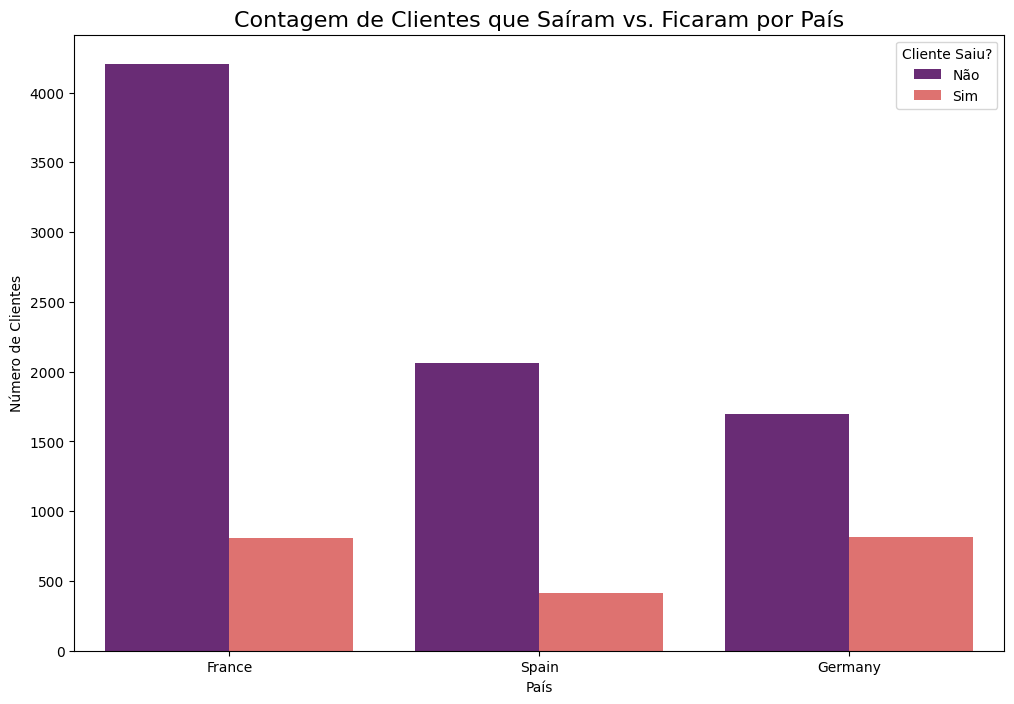

In [67]:
plt.figure(figsize=(12,8))

sns.countplot(data=data, x='geography',
           hue=data['exited'],
           palette='magma')
plt.title('Contagem de Clientes que Saíram vs. Ficaram por País', fontsize=16)
plt.xlabel('País')
plt.ylabel('Número de Clientes')
plt.legend(title='Cliente Saiu?', labels=['Não', 'Sim'])

plt.show()

A análise de churn por país mostra que, embora a França tenha o maior número absoluto de clientes e, consequentemente, de cancelamentos, é a Alemanha que apresenta a maior taxa de churn proporcional. Isso identifica a Alemanha como o mercado mais crítico para as estratégias de retenção, apesar de seu menor volume de clientes.

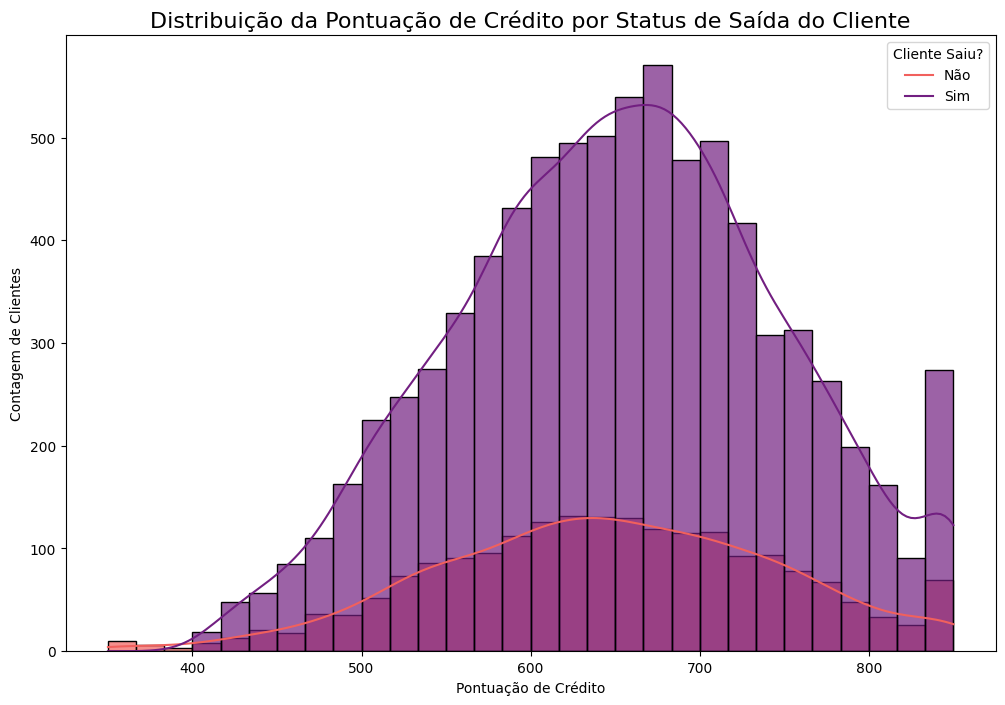

In [68]:
plt.figure(figsize=(12, 8))
sns.histplot(
    data=data,
    x='creditscore',
    hue='exited',
    bins=30,
    kde=True, 
    palette='magma', 
    alpha=0.7
)
plt.title('Distribuição da Pontuação de Crédito por Status de Saída do Cliente', fontsize=16)
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Cliente Saiu?', labels=['Não', 'Sim'])

plt.show()

A análise da pontuação de crédito revela um padrão notável: o pico de churn ocorre em clientes com score considerado bom (entre 650 e 700). Acima dessa faixa, a propensão ao cancelamento diminui consistentemente à medida que a pontuação de crédito melhora.

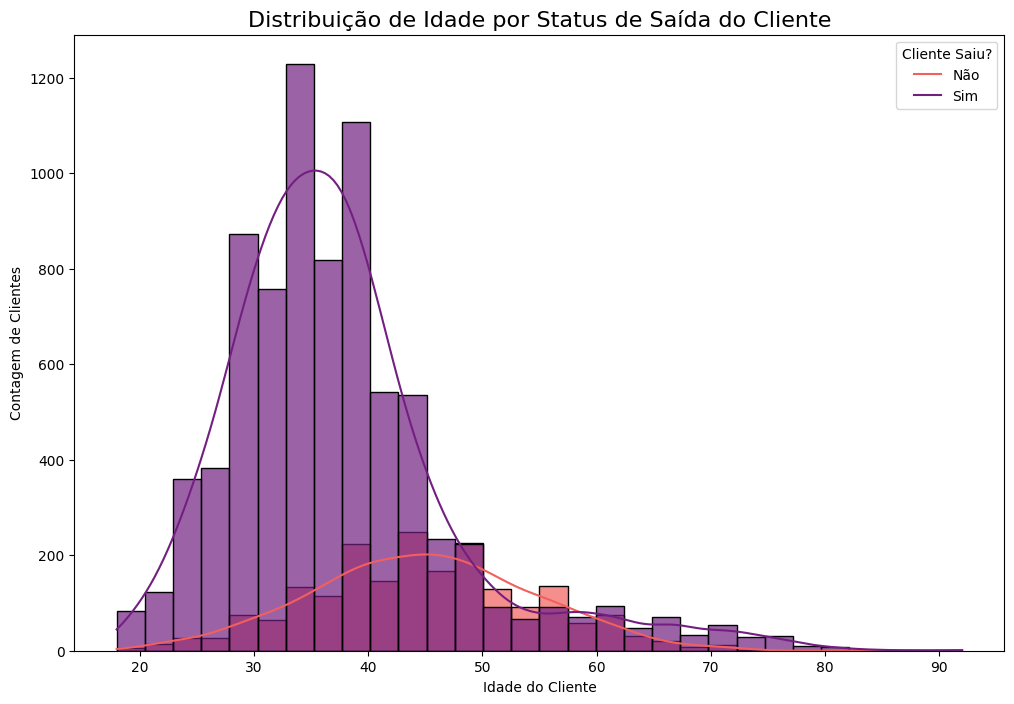

In [74]:
plt.figure(figsize=(12, 8))
sns.histplot(
    data=data,
    x='age',
    hue='exited',
    bins=30, 
    kde=True,
    palette='magma',
    alpha=0.7
)
plt.title('Distribuição de Idade por Status de Saída do Cliente', fontsize=16)
plt.xlabel('Idade do Cliente')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Cliente Saiu?', labels=['Não', 'Sim'])

plt.show()

A relação entre a idade do cliente e a probabilidade de churn demonstra um comportamento específico para diferentes faixas etárias:

* Grupo de Risco (30-40 anos): Observa-se uma concentração significativa de cancelamentos nesta faixa etária. Isso sugere que clientes neste estágio da vida podem ter necessidades financeiras que o banco não está atendendo adequadamente.

* Grupo de Maior Lealdade (40-50 anos): Em contrapartida, este grupo representa a base de clientes mais fiel, com a menor incidência de churn. A satisfação e retenção neste segmento são notavelmente maiores.

Concluindo o padrão identificado indica que os esforços de retenção do banco devem ser prioritariamente focados nos clientes mais jovens, especificamente na faixa de 30 a 40 anos, onde o risco de perda é maior.

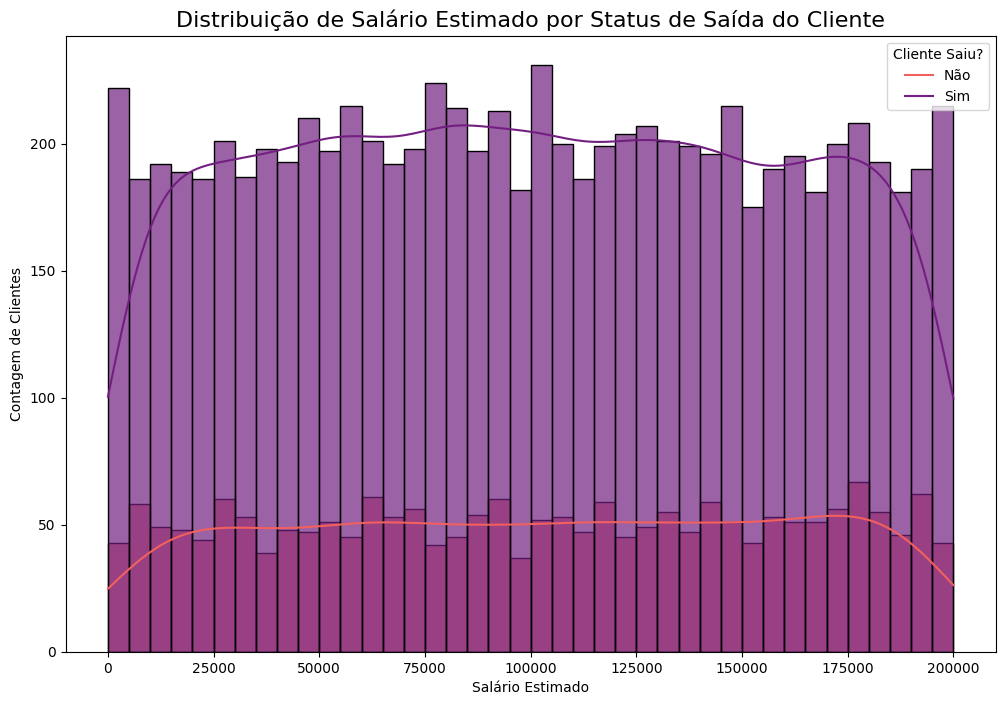

In [70]:
plt.figure(figsize=(12, 8))
sns.histplot(
    data=data,
    x='estimatedsalary',
    hue='exited',
    bins=40,
    kde=True,
    palette='magma',
    alpha=0.7
)
plt.title('Distribuição de Salário Estimado por Status de Saída do Cliente', fontsize=16)
plt.xlabel('Salário Estimado')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Cliente Saiu?', labels=['Não', 'Sim'])

plt.show()

A relação entre o salário estimado e a saída de clientes não segue uma tendência linear, mas aponta para um segmento de risco muito específico:

* Pico de Churn em Renda Média-Alta: O maior volume de cancelamentos é observado em clientes com uma faixa de renda considerável, situada entre $75.000 - $110.000 anuais.

* Comportamento Contraintuitivo: Este padrão sugere que o problema de retenção do banco não está nos clientes de menor poder aquisitivo (que poderiam ser mais sensíveis a taxas), mas sim em um grupo com renda substancial que pode ter expectativas mais altas de produtos, serviços ou atendimento que não estão sendo atendidas.

Concluindo este achado é crucial, pois indica a perda de clientes potencialmente valiosos. As ações de retenção devem investigar as causas de insatisfação específicas deste perfil de cliente de média-alta renda para evitar a evasão de contas com alto potencial.

# Teste de Hipotese

*Nessa etapa será realizado um teste de hipotese baseado no grafico que foi construido na correlaçao da idade dos clientes que saem ou nao do banco, assim teremos um dado comprovado estatisticamente de um dos problemas que o Beta Bank vem enfrentando e como pode ser o plano de ação, que também poderá influenciar o modelo que será criado.*

*Alem disso será feito um teste de KS para que possamos comparar duas faixas de grupos salariais diferentes, ja que no EDA pude notar que clientes que possuem salarios de 75k a 110000 tem a maior taxa de cancelamentos e abandono*

In [71]:
from scipy.stats import ttest_ind
# Separação dos dados 'age' de clientes que sairam ou não
clientes_que_sairam = data[data['exited'] == 1]['age']
clientes_que_ficaram = data[data['exited'] == 0]['age']
# Verificar a variancia para definir o equal_var()
print(f"Variância dos que sairam: {clientes_que_sairam.var():.2f}")
print(f"Variância dos que ficaram: {clientes_que_ficaram.var():.2f}")

Variância dos que sairam: 95.29
Variância dos que ficaram: 102.52


In [72]:
stat, p_value = ttest_ind(clientes_que_sairam, clientes_que_ficaram, equal_var=False)

print(f"Estatística do teste t: {stat:.4f}")
print(f"Valor-p (p-value): {p_value}") 

alpha = 0.05

if p_value < alpha:
    print("\nConclusão: Rejeitamos a Hipótese Nula.")
    print("Há uma diferença estatisticamente significativa na idade média entre os clientes que saem e os que ficam.")
else:
    print("\nConclusão: Não podemos rejeitar a Hipótese Nula.")
    print("Não há evidências de uma diferença estatisticamente significativa na idade média.")


Estatística do teste t: 30.4192
Valor-p (p-value): 4.7127272656641046e-179

Conclusão: Rejeitamos a Hipótese Nula.
Há uma diferença estatisticamente significativa na idade média entre os clientes que saem e os que ficam.


In [73]:
from scipy.stats import ks_2samp

salario_dos_que_sairam = data[data['exited'] == 1]['estimatedsalary']
salario_dos_que_ficaram = data[data['exited'] == 0]['estimatedsalary']

# Teste de Kolmogorov-Smirnov para comparativo de distrubuiçoes de dois grupos
stat_ks, p_value_ks = ks_2samp(salario_dos_que_sairam, salario_dos_que_ficaram)

print(f"Estatística do teste K-S: {stat_ks:.4f}")
print(f"Valor-p (p-value): {p_value_ks}")

alpha = 0.05
if p_value_ks < alpha:
    print("\nConclusão: Rejeitamos a Hipótese Nula.")
    print("A distribuição de salário é estatisticamente diferente para os clientes que saem e os que ficam.")
else:
    print("\nConclusão: Não podemos rejeitar a Hipótese Nula.")
    print("Não há evidência de que as distribuições de salário sejam diferentes.")


Estatística do teste K-S: 0.0235
Valor-p (p-value): 0.32498799277316914

Conclusão: Não podemos rejeitar a Hipótese Nula.
Não há evidência de que as distribuições de salário sejam diferentes.


# Criação de Modelo

In [81]:
from sklearn.model_selection import train_test_split

data_ohe = pd.get_dummies(data, columns=['geography', 'gender'], drop_first=True)

print("Amostra dos dados após OHE")
data_ohe.head()

Amostra dos dados após OHE


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [82]:
features = data_ohe.drop('exited', axis=1)
target = data_ohe['exited']

# Primeira divisão: 80% para treino/validação e 20% para teste
features_train_val, features_test, target_train_val, target_test = train_test_split(
    features, target, test_size=0.20, random_state=42, stratify=target
)

# Segunda divisão: dos 80%, separamos em 75% para treino (60% do total) e 25% para validação (20% do total)
features_train, features_validation, target_train, target_validation = train_test_split(
    features_train_val, target_train_val, test_size=0.25, random_state=42, stratify=target_train_val
)

print(f"Tamanho do conjunto de Treinamento: {len(features_train)} amostras")
print(f"Tamanho do conjunto de Validação: {len(features_validation)} amostras")
print(f"Tamanho do conjunto de Teste: {len(features_test)} amostras")


Tamanho do conjunto de Treinamento: 6000 amostras
Tamanho do conjunto de Validação: 2000 amostras
Tamanho do conjunto de Teste: 2000 amostras


# 3.1 Base Line

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import resample

In [84]:
# Criaçao dos modelos de regressao e floresta aleatoria
models = {
    "Regressão Logística": LogisticRegression(random_state=42, solver='liblinear'),
    "Floresta Aleatória": RandomForestClassifier(random_state=42, n_estimators=100)
}
for name, model in models.items():
    model.fit(features_train, target_train)
    predictions = model.predict(features_validation)
# Calculo de métricas com f1 e roc_auc
    f1 = f1_score(target_validation, predictions)
    roc_auc = roc_auc_score(target_validation, model.predict_proba(features_validation)[:, 1])
    print(f"{name}:")
    print(f"  F1-Score (Validação): {f1:.4f}")
    print(f"  AUC-ROC (Validação): {roc_auc:.4f}\n")


Regressão Logística:
  F1-Score (Validação): 0.0653
  AUC-ROC (Validação): 0.6635

Floresta Aleatória:
  F1-Score (Validação): 0.5960
  AUC-ROC (Validação): 0.8539



# 3.2 Tratamento 

In [86]:
# Ponderação de Classe (class_weight='balanced')
models_weighted = {
    "Regressão Logística Ponderada": LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'),
    "Floresta Aleatória Ponderada": RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
}

for name, model in models_weighted.items():
    model.fit(features_train, target_train)
    predictions = model.predict(features_validation)
    f1 = f1_score(target_validation, predictions)
    roc_auc = roc_auc_score(target_validation, model.predict_proba(features_validation)[:, 1])
    print(f"{name}:")
    print(f"  F1-Score (Validação): {f1:.4f}")
    print(f"  AUC-ROC (Validação): {roc_auc:.4f}\n")

Regressão Logística Ponderada:
  F1-Score (Validação): 0.4647
  AUC-ROC (Validação): 0.7539

Floresta Aleatória Ponderada:
  F1-Score (Validação): 0.5531
  AUC-ROC (Validação): 0.8549



In [87]:
# Upsampling (Sobreamostragem)
train_data = pd.concat([features_train, target_train], axis=1)
majority = train_data[train_data.exited == 0]
minority = train_data[train_data.exited == 1]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)
upsampled_data = pd.concat([majority, minority_upsampled])

# Separar novamente features e target do novo conjunto de dados balanceado
features_upsampled = upsampled_data.drop('exited', axis=1)
target_upsampled = upsampled_data['exited']
# Treinar os modelos originais nos dados com upsampling
for name, model in models.items():
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_validation)
    f1 = f1_score(target_validation, predictions)
    roc_auc = roc_auc_score(target_validation, model.predict_proba(features_validation)[:, 1])
    print(f"{name} (com Upsampling):")
    print(f"  F1-Score (Validação): {f1:.4f}")
    print(f"  AUC-ROC (Validação): {roc_auc:.4f}\n")

Regressão Logística (com Upsampling):
  F1-Score (Validação): 0.4358
  AUC-ROC (Validação): 0.7118

Floresta Aleatória (com Upsampling):
  F1-Score (Validação): 0.6192
  AUC-ROC (Validação): 0.8567



# 3.3 Otimização

In [88]:
best_f1 = 0
best_params = {}

for n_est in range(50, 201, 50):
    for depth in range(10, 31, 10):
        model_opt = RandomForestClassifier(
            random_state=42, 
            n_estimators=n_est, 
            max_depth=depth)
        model_opt.fit(features_upsampled, target_upsampled)
        
        predictions_val = model_opt.predict(features_validation)
        current_f1 = f1_score(target_validation, predictions_val)
        
        print(f"Testando: n_estimators={n_est}, max_depth={depth} - F1-Score: {current_f1:.4f}")
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_params = {'n_estimators': n_est, 'max_depth': depth}

print(f"Melhor F1-Score no conjunto de Validação: {best_f1:.4f}")
print(f"Melhores Parâmetros Encontrados: {best_params}")

Testando: n_estimators=50, max_depth=10 - F1-Score: 0.6135
Testando: n_estimators=50, max_depth=20 - F1-Score: 0.6019
Testando: n_estimators=50, max_depth=30 - F1-Score: 0.6053
Testando: n_estimators=100, max_depth=10 - F1-Score: 0.6169
Testando: n_estimators=100, max_depth=20 - F1-Score: 0.6100
Testando: n_estimators=100, max_depth=30 - F1-Score: 0.6192
Testando: n_estimators=150, max_depth=10 - F1-Score: 0.6206
Testando: n_estimators=150, max_depth=20 - F1-Score: 0.6257
Testando: n_estimators=150, max_depth=30 - F1-Score: 0.6210
Testando: n_estimators=200, max_depth=10 - F1-Score: 0.6246
Testando: n_estimators=200, max_depth=20 - F1-Score: 0.6259
Testando: n_estimators=200, max_depth=30 - F1-Score: 0.6190
Melhor F1-Score no conjunto de Validação: 0.6259
Melhores Parâmetros Encontrados: {'n_estimators': 200, 'max_depth': 20}


In [91]:
# Teste final do modelo com random Forest com upsampled que foi o melhor teste 
final_model = RandomForestClassifier(
    random_state=42, 
    n_estimators=best_params['n_estimators'], 
    max_depth=best_params['max_depth']
)

final_model.fit(features_upsampled, target_upsampled)
predictions_test = final_model.predict(features_test)
probabilities_test = final_model.predict_proba(features_test)[:, 1]
# Métricas finais do teste
final_f1_score = f1_score(target_test, predictions_test)
final_roc_auc = roc_auc_score(target_test, probabilities_test)

print(f"Métricas no Conjunto de Teste:")
print(f"F1-Score Final: {final_f1_score:.4f}")
print(f"AUC-ROC Final: {final_roc_auc:.4f}")

target_f1 = 0.59
if final_f1_score >= target_f1:
    print(f"\nParabéns! O modelo atingiu a meta de F1-score de {target_f1}.")
else:
    print(f"\nO modelo não atingiu a meta de F1-score de {target_f1}.")


Métricas no Conjunto de Teste:
F1-Score Final: 0.5958
AUC-ROC Final: 0.8516

Parabéns! O modelo atingiu a meta de F1-score de 0.59.


# Conclusão

O projeto teve como objetivo principal desenvolver um modelo de Machine Learning para o Beta Bank, capaz de prever quais clientes tinham maior probabilidade de encerrar seus contratos. A meta era construir um modelo com o maior F1-score possível, estabelecendo um critério mínimo de 0.59 para o conjunto de teste, a fim de criar uma ferramenta eficaz para a retenção dos clientes.


Para alcançar este objetivo, o processo iniciou com uma Análise Exploratória de Dados, que revelou insights importantes sobre o perfil dos clientes que saem, destacando-se fatores como país (Alemanha), idade e faixas específicas de score de crédito. O principal desafio técnico identificado foi o forte desequilíbrio de classes nos dados. 


Para a modelagem, foram comparadas diferentes estratégias:

* Modelo Baseline: Inicialmente, modelos de Regressão Logística e Floresta Aleatória foram treinados nos dados desbalanceados, resultando em um F1-score baixo, o que confirmou a necessidade de um tratamento específico para o desequilíbrio.

* Tratamento do Desequilíbrio: Foram implementadas e comparadas duas abordagens distintas para corrigir o desequilíbrio: a ponderação de classes `(através do parâmetro class_weight='balanced')` e a sobreamostragem da classe minoritária `(Upsampling)`.

A estratégia de Upsampling combinada com o modelo Floresta Aleatória demonstrou a performance mais robusta no conjunto de validação e foi selecionada para a otimização final. Após o ajuste de hiperparâmetros, o modelo campeão foi avaliado no conjunto de teste, alcançando os seguintes resultados:

F1-Score Final: 0.5958

AUC-ROC Final: 0.8516

O resultado do F1-score final atingiu a meta de 0.59 estabelecida, validando o modelo como uma ferramenta eficaz para o problema proposto.

Na prática, isso significa que o Beta Bank agora possui um recurso capaz de identificar proativamente clientes com alto risco de cancelamento, permitindo que a equipe de retenção atue de forma direcionada e mais econômica. O modelo, portanto, não apenas cumpre os requisitos técnicos, mas também oferece um valor de negócio ao ajudar a reduzir a perda de clientes.